# Support Vector Machine

Support vector machines with $K > 2$ classes are broken into two "flavours":
- **one-versus-rest**: Fit a separate SVM for each class against the rest, and classify according to the highest score.
- **one-versus-one**: Fit a separate SVM for each pair of classes, and classify according to the class that wins the most.

We choose to focus on one-versus-rest, because it fits fewer models (thus fewer parameters).

## Setup

In [1]:
from tune import (
    Categorical,
    Constant,
    Integer,
    outer_cv,
    Real,
    SupportVectorMachineBayesTuner,
)

Using 5 cores


## Tuning

For tuning, `sklearn` provides us 4 kernels, each slightly differently parameterized.
Of these, we consider the linear, polynomial, and radial basis function kernels.
The sigmoid kernel is [never guaranteed to be positive semi-definite](https://search.r-project.org/CRAN/refmans/kernlab/html/dots.html) so we avoid using it. Moreover, the linear kernel is just a special case of the polynomial kernel (`degree = 1`, `gamma = 1`, `coef0 = 0`) so we can specify it together with the polynomial kernel.

Outer CV using 1 cores


[INFO/LokyProcess-1] child process calling self.run()
[INFO/LokyProcess-2] child process calling self.run()
[INFO/LokyProcess-5] child process calling self.run()
[INFO/LokyProcess-3] child process calling self.run()
[INFO/LokyProcess-4] child process calling self.run()
[INFO/MainProcess] 1  Tuned model in 186.06070017814636 seconds
[INFO/MainProcess] 1  Saved to cache at ../models/svm/cv-1.mdl
[INFO/MainProcess] 1  Best configuration: OrderedDict([('C', 3157.557622085512), ('gamma', 0.0025853410296964737), ('kernel', 'rbf')])
[INFO/MainProcess] 1	Accuracy: 0.9478672985781991
/home/xujustinj/projects/pokemon-type-classification/.venv/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
[INFO/MainProcess] 2  Tuned model in 178.84045028686523 seconds
[INFO/MainProcess] 2  Saved to cache at ../models/svm/cv-2.mdl
[INFO/MainProcess] 2  Best configuration: Ordered

<Figure size 1000x1000 with 0 Axes>

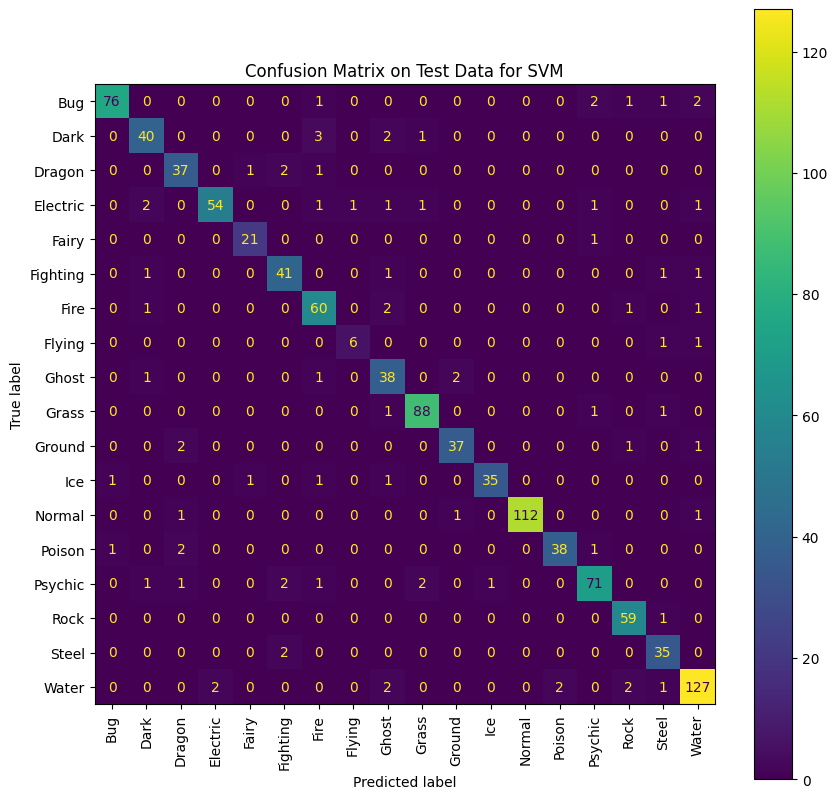

0.9250417512976755

[INFO/LokyProcess-1] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-1] process shutting down
[INFO/LokyProcess-1] process exiting with exitcode 0
[INFO/LokyProcess-5] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-3] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-4] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-2] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-5] process shutting down
[INFO/LokyProcess-5] process exiting with exitcode 0
[INFO/LokyProcess-3] process shutting down
[INFO/LokyProcess-3] process exiting with exitcode 0
[INFO/LokyProcess-4] process shutting down
[INFO/LokyProcess-4] process exiting with exitcode 0
[INFO/LokyProcess-2] process shutting down
[INFO/LokyProcess-2] process exiting with exitcode 0


In [2]:
tuner = SupportVectorMachineBayesTuner()
space = [
    dict(
        kernel=Constant("poly"),
        degree=Integer(low=2, high=5, prior="log-uniform"),
        C=Real(low=1e-4, high=1e4, prior="log-uniform"),
        gamma=Real(low=1e-3, high=1e3, prior="log-uniform"),
        coef0=Categorical([0.0, 1.0]),  # effect of coef0 scales with gamma
    ), 
    dict(
        kernel=Constant("rbf"),
        C=Real(low=1e-4, high=1e4, prior="log-uniform"),
        gamma=Real(low=1e-3, high=1e3, prior="log-uniform"),
    ),
]
outer_cv(tuner=tuner, search=space, name="SVM", parallelism=1)